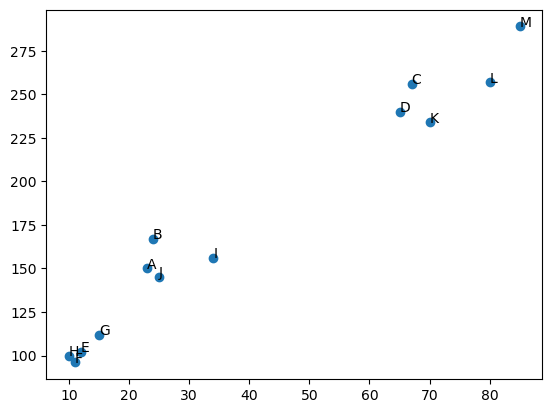

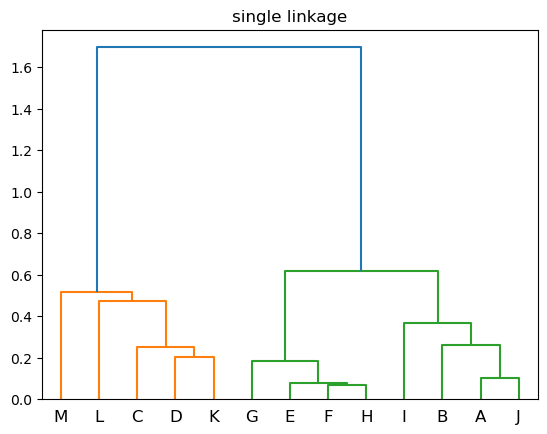

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\simp_clust.csv", index_col=0)

plt.scatter(df['X1'],df['X2'])
for i in range(0,df.shape[0]):
    plt.text(x=df['X1'].values[i], 
             y=df['X2'].values[i],
             s=list(df.index)[i])
plt.show()

scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.show()

################################################


[1 1 0 0 2 2 2 2 1 1 0 0 0]


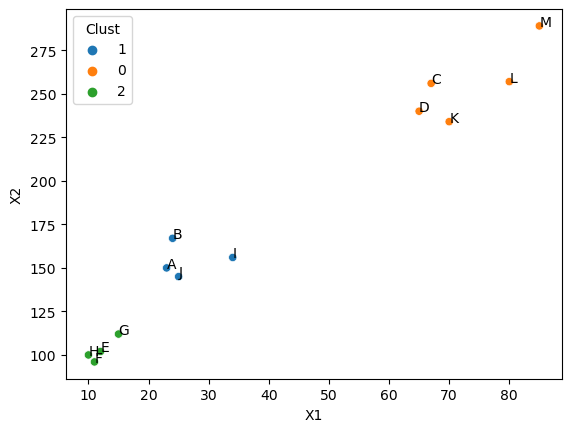

0.748692102698497
Best no. of clusters: 2
Best Score: 0.768624569487621


In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scaled)

print(clust.labels_)

df_clust = df.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

sns.scatterplot(x=df_clust['X1'], y=df_clust['X2'],
                hue=df_clust['Clust'])
for i in range(0, df.shape[0] ):
    plt.text(df_clust['X1'].values[i], 
             df_clust['X2'].values[i], 
             list(df.index)[i])
plt.show()

print(silhouette_score(df_scaled, clust.labels_))

Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

In [8]:
nut = pd.read_csv(r"C:\Users\dai\Desktop\Machine Learning\Datasets\nutrient.csv",index_col=0)

In [9]:
scaler = StandardScaler().set_output(transform='pandas')
scaler.fit(nut)
nutscaled = scaler.transform(nut)

In [10]:
from sklearn.decomposition import PCA

clust = AgglomerativeClustering(n_clusters=4)
clust.fit(nutscaled)

print(clust.labels_)

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 3 0 0]


In [11]:
pca = PCA().set_output(transform ='pandas')
principalComponents = pca.fit_transform(nutscaled)

In [12]:
print(pca.explained_variance_ratio_ * 100)

[4.39264687e+01 2.29177954e+01 1.69542689e+01 1.61694340e+01
 3.20329884e-02]


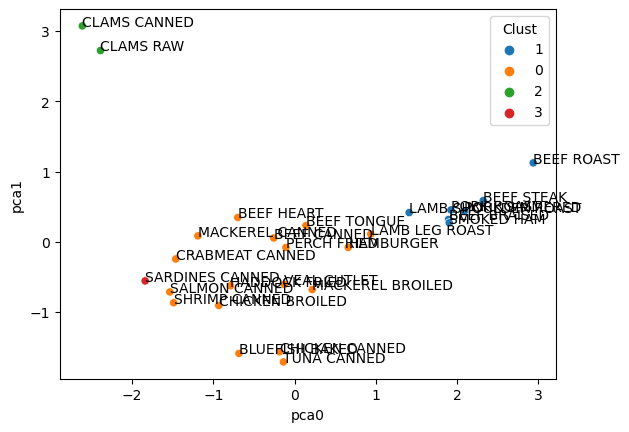

In [14]:
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

sns.scatterplot(data=principalComponents,x='pca0', y='pca1',
                hue='Clust')
for i in np.arange(0, nut.shape[0] ):
    plt.text(principalComponents.values[i,0], 
             principalComponents.values[i,1], 
             list(nut.index)[i])
plt.show()


In [3]:
df = pd.read_csv("C:/Users\dai\Desktop\Machine Learning\Datasets\Country-data.csv", index_col=0)